
# Comparación detallada de distribuciones ON vs OFF con visualizaciones

Este notebook permite:

- Convertir dos listas de significancias (`z_on`, `z_off`) en p-valores con varias distribuciones (normal, t-student, Gumbel, mejor ajustada)
- Calcular el estadístico de Fisher y comparar ON vs OFF
- Realizar simulaciones Monte Carlo con p-valores empíricos
- Ajustar distribuciones teóricas a histogramas con `curve_fit`
- **Visualizar todas las PDFs ajustadas y los histogramas ON y OFF para comparación detallada**

Reemplaza las listas `z_on` y `z_off` con tus datos reales antes de ejecutar.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, t, gumbel_r, chi2, kstest
from scipy.optimize import curve_fit


(array([ 1.,  1.,  1.,  0., 13., 22., 25., 12., 11.,  4.]),
 array([-2.91616247, -2.27954622, -1.64292998, -1.00631373, -0.36969748,
         0.26691876,  0.90353501,  1.54015126,  2.17676751,  2.81338375,
         3.45      ]),
 <BarContainer object of 10 artists>)

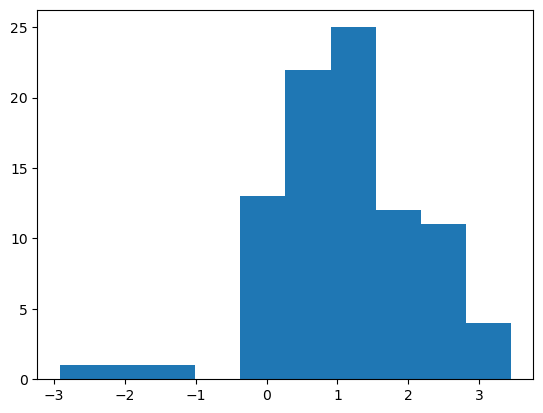

In [2]:
source_on=[0.27652459081559916, 1.1802728757073235, -1.119599012783303, -1.9960433641517563, 0.40100275333575064, -2.9161624719406802, 1.6099999999999999, 2.3100000000000014, 0.65, 0.0, 0.5799999999999998, 1.5800000000000007, 0.0, 2.549999999999998, 2.2200000000000015, 0.66, 2.7200000000000046, 1.0499999999999998, 1.0499999999999998, 1.4399999999999997, 2.0599999999999996, 0.2700000000000002, 1.0599999999999998, 0.38000000000000006, 0.8999999999999999, 1.9300000000000006, 0.0, 0.52, 1.7499999999999996, 1.0999999999999999, 0.059999999999999984, 2.8700000000000054, 0.2700000000000002, 0.0, 1.0099999999999996, 0.8300000000000002, 1.6000000000000003, 0.2700000000000002, 0.7100000000000001, 0.0, 0.84, 0.36999999999999994, 0.09333357287547434, 1.4797347826972556, 0.9848906128231127, 0.5058460775322822, 1.1032209558140882, 0.615972362625652, 2.3420162866669525, 0.983843138577162, -0.011783580173950953, 1.8499999999999994, 0.6000000000000001, 1.0, 0.2700000000000002, 2.8999999999999986, 0.98, 0.0, 2.21, 0.7799999999999999, 1.12, 2.1900000000000017, 2.9700000000000033, 0.7400000000000003, 2.0599999999999996, 1.0200000000000002, 1.92, 1.2200000000000002, 1.2300000000000006, 0.9200000000000002, 0.0, 0.9300000000000003, 2.02, 2.1799999999999997, 1.7700000000000005, 3.4499999999999553, 0.0, 2.200000000000001, 1.2200000000000002, 0.0, 1.2499999999999993, 1.2599999999999998, 2.479999999999997, 2.5099999999999976, 1.9500000000000006, 0.55, 1.2200000000000002, 0.0, 1.3000000000000003, 1.3400000000000007]
source_off=[0.3762053278917501, 0.5420599746632863, 0.33019448736380297, 0.9408828013415984, 0.39249240998376766, 0.8299271551913422, 0.5, 0.0026354020779049137, 0.3631693488243809, 0.05261613845425206, 0.26108629969286157, 0.5, 0.15150500278834367, 0.054799291699557995, 0.4522415739794161, 0.026189844940452733, 0.5, 0.5, 0.1292381122400179, 0.5, 0.02275013194817921, 0.17878637961437172, 0.15150500278834367, 0.08075665923377107, 0.007760253550553653, 0.5, 0.4090458848579941, 0.1867329430371727, 0.16602324606352958, 0.015777607391090465, 0.19766254312269238, 0.5, 0.20326939182806836, 0.07493369953432705, 0.11123243744783462, 0.01742917793765708, 0.03593031911292577, 0.06943662333333167, 0.5, 0.46414360741482785, 0.01700302264763276, 0.10564977366685535, 0.11702319602310873, 0.36692826396397193, 0.1292381122400179, 0.5, 0.036726955698726305, 0.12714315056279824, 0.5, 0.29805596539487644, 0.5, 0.1736087803386246, 0.2809573088985644, 0.06552171208891644, 0.09012267246445238, 0.5, 0.20897008787160165, 0.3409029737723226, 0.20610805358581308, 0.12302440305134343, 0.1814112548917972, 0.4090458848579941, 0.1635430593276923, 0.5, 0.0351478935840388, 0.07926984145339233, 0.007142810735271454, 0.5, 0.0027179449227012764, 0.5, 0.0002157733992946831, 0.11123243744783462, 0.4090458848579941, 0.043632936524031884, 0.048457226266722775, 0.5, 0.19766254312269238, 0.050502583474103746, 0.054799291699557995, 0.4051651283022042, 0.15624764502125466, 0.24509709367430943, 0.05937994059479301, 0.17618554224525784, 0.8541838700529854, 0.13941376474909528, 0.3811371565028304, 0.5516603082928957, 0.2291085235656768, 0.9320401129826985, 0.36196788362154375, 0.998228170429232, 0.9246527950103394, 0.009903075559164254, 0.16852760746683781, 0.024419185280222577, 0.20610805358581308, 0.5, 0.5, 0.41293557735178543, 0.5, 0.5, 0.0067556526071406164, 0.03753798034851674, 0.010170438668719695, 0.5, 0.26108629969286157, 0.22662735237686826, 0.5, 0.5, 0.08534345082196704, 0.0036811080091749826, 0.3556912451994533, 0.08850799143740196, 0.17105612630848177, 0.1867329430371727, 0.4051651283022042, 0.16852760746683781, 0.4012936743170763, 0.3782804781779807, 0.3631693488243809, 0.009137467530572652, 0.3409029737723226, 0.2296499971647905, 0.0034669738030406183, 0.5, 0.5, 0.01390344751349859, 0.5, 0.01617738337216612, 0.3631693488243809, 0.36692826396397193, 0.012545461435946592, 0.004798796597126231, 0.4800611941616275, 0.03753798034851674, 0.5, 0.4800611941616275, 0.5, 0.2514288950953101, 0.04745968180294735, 0.1867329430371727, 0.10383468112130045, 0.3594235667820087, 0.3594235667820087, 0.013552581146419995, 0.03362496941962834, 0.044565462758543006, 0.12100048442101818, 0.5, 0.22064994634264967, 0.027428949703836802, 0.05591740251946942, 0.06680720126885809, 0.11900010745520073, 0.050502583474103746, 0.5, 0.08226443867766897, 0.21185539858339664, 0.10027256795444206, 0.0014889987452374465, 0.5, 0.08075665923377107, 0.4090458848579941, 0.1867329430371727, 0.3631693488243809, 0.2388520680899867, 0.06178017671181191, 0.03593031911292577, 0.1948945212518084, 0.008656319025516557, 0.3050257308975194, 0.5, 0.09509791779523902, 0.03593031911292577, 0.38973875244420275, 0.05261613845425206, 0.15865525393145707, 0.05369892814811972, 0.5, 0.47607781734589316]
z_on = np.array(source_on)
z_off = np.array(source_off)
plt.hist(z_on)



In [3]:

def fit_and_get_pvals(z, dist):
    params = dist.fit(z)
    return 1 - dist.cdf(z, *params), params

def fisher_stat(pvals):
    chi2_val = -2 * np.sum(np.log(pvals))
    p_comb = 1 - chi2.cdf(chi2_val, 2 * len(pvals))
    sigma = norm.isf(p_comb)
    return chi2_val, p_comb, sigma


In [4]:

dists = {"Normal": norm, "t-Student": t, "Gumbel": gumbel_r}
resultados = []

for name, dist in dists.items():
    pvals_on, _ = fit_and_get_pvals(z_on, dist)
    pvals_off, _ = fit_and_get_pvals(z_off, dist)
    chi2_on, p_on, sig_on = fisher_stat(pvals_on)
    chi2_off, p_off, sig_off = fisher_stat(pvals_off)
    resultados.append({
        "Distribución": name,
        "Chi² ON": chi2_on, "p_comb ON": p_on, "σ ON": sig_on,
        "Chi² OFF": chi2_off, "p_comb OFF": p_off, "σ OFF": sig_off
    })

# Mejor distribución ajustada por KS
ks = {k: kstest(z_on, v.cdf, args=v.fit(z_on)).statistic for k, v in dists.items()}
best_name = min(ks, key=ks.get)
best_dist = dists[best_name]
pvals_on, _ = fit_and_get_pvals(z_on, best_dist)
pvals_off, _ = fit_and_get_pvals(z_off, best_dist)
chi2_on, p_on, sig_on = fisher_stat(pvals_on)
chi2_off, p_off, sig_off = fisher_stat(pvals_off)
resultados.append({
    "Distribución": f"Mejor ajustada ({best_name})",
    "Chi² ON": chi2_on, "p_comb ON": p_on, "σ ON": sig_on,
    "Chi² OFF": chi2_off, "p_comb OFF": p_off, "σ OFF": sig_off
})

df_comp = pd.DataFrame(resultados)
df_comp


,Distribución,Chi² ON,p_comb ON,σ ON,Chi² OFF,p_comb OFF,σ OFF
0,Normal,176.296605,0.564085,-0.161335,372.398078,0.341812,0.407523
1,t-Student,178.865643,0.509872,-0.024748,379.192635,0.256621,0.653798
2,Gumbel,147.412291,0.963912,-1.798010,375.517926,0.301193,0.520973
3,Mejor ajustada (t-Student),178.865643,0.509872,-0.024748,379.192635,0.256621,0.653798


/tmp/ipykernel_873628/405393887.py:5: RuntimeWarning: divide by zero encountered in log
  chi_obs_emp = -2 * np.sum(np.log(p_emp))


Empírico: Chi² = inf, p = 0.0000, σ = inf


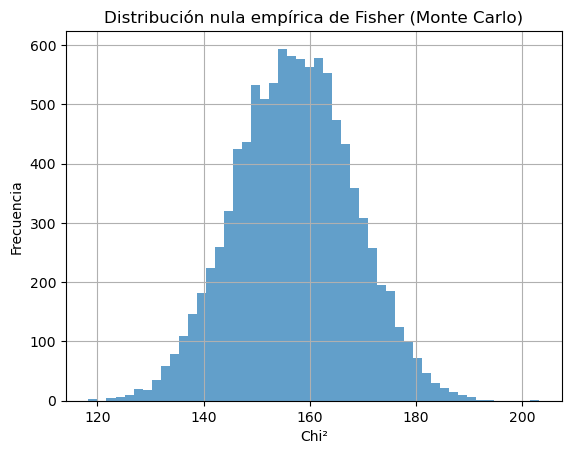

In [5]:

def empirical_p(z, background):
    return np.array([np.sum(background >= zi) / len(background) for zi in z])

p_emp = empirical_p(z_on, z_off)
chi_obs_emp = -2 * np.sum(np.log(p_emp))
n_reps = 10000
chi_null = np.zeros(n_reps)
for i in range(n_reps):
    sample = np.random.choice(z_off, size=len(z_on), replace=False)
    p_sample = empirical_p(sample, z_off)
    chi_null[i] = -2 * np.sum(np.log(p_sample))

p_emp_mc = np.mean(chi_null >= chi_obs_emp)
sig_emp_mc = norm.isf(p_emp_mc)

print(f"Empírico: Chi² = {chi_obs_emp:.2f}, p = {p_emp_mc:.4f}, σ = {sig_emp_mc:.2f}")
plt.hist(chi_null, bins=50, alpha=0.7)
plt.axvline(chi_obs_emp, color="red", linestyle="--")
plt.title("Distribución nula empírica de Fisher (Monte Carlo)")
plt.xlabel("Chi²")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


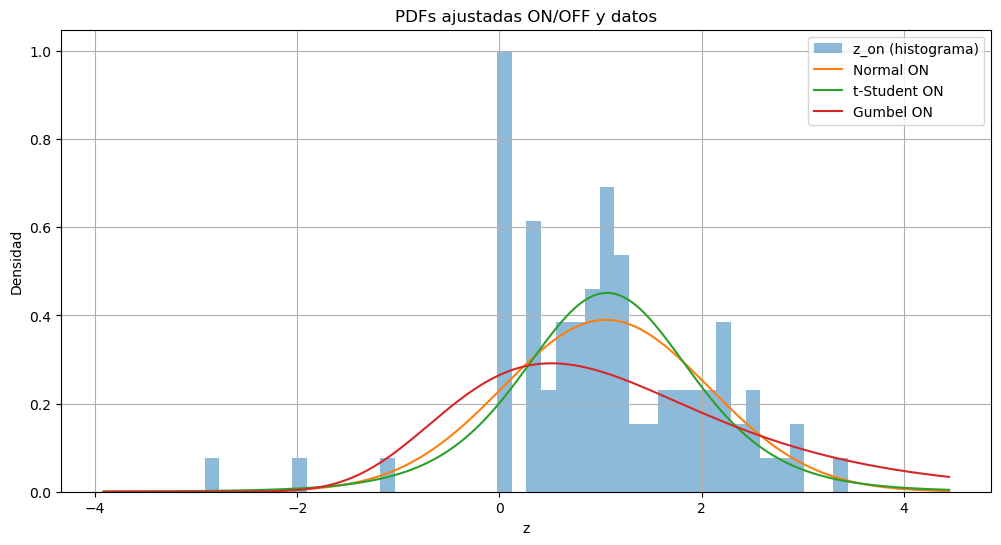

In [10]:

x_vals = np.linspace(min(min(z_on), min(z_off)) - 1, max(max(z_on), max(z_off)) + 1, 300)
plt.figure(figsize=(12, 6))

# Histogramas
bins = np.linspace(min(min(z_on), min(z_off)), max(max(z_on), max(z_off)), 45)
plt.hist(z_on, bins=bins, density=True, alpha=0.5, label="z_on (histograma)")
# plt.hist(z_off, bins=bins, density=True, alpha=0.5, label="z_off (histograma)")

# PDFs ajustadas
for name, dist in dists.items():
    params_on = dist.fit(z_on)
    params_off = dist.fit(z_off)
    pdf_on = dist.pdf(x_vals, *params_on)
    pdf_off = dist.pdf(x_vals, *params_off)
    plt.plot(x_vals, pdf_on, label=f"{name} ON")
    # plt.plot(x_vals, pdf_off, '--', label=f"{name} OFF")

plt.title("PDFs ajustadas ON/OFF y datos")
plt.xlabel("z")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()


In [7]:

# Test de Kolmogorov-Smirnov para ON y OFF con cada distribución
ks_results = []

for name, dist in dists.items():
    params_on = dist.fit(z_on)
    params_off = dist.fit(z_off)
    ks_on = kstest(z_on, dist.cdf, args=params_on)
    ks_off = kstest(z_off, dist.cdf, args=params_off)
    ks_results.append({
        "Distribución": name,
        "KS D ON": ks_on.statistic,
        "p KS ON": ks_on.pvalue,
        "KS D OFF": ks_off.statistic,
        "p KS OFF": ks_off.pvalue
    })

pd.DataFrame(ks_results)


,Distribución,KS D ON,p KS ON,KS D OFF,p KS OFF
0,Normal,0.115669,0.166258,0.119063,0.010800
1,t-Student,0.091192,0.417783,0.120693,0.009359
2,Gumbel,0.185800,0.003418,0.122113,0.008247


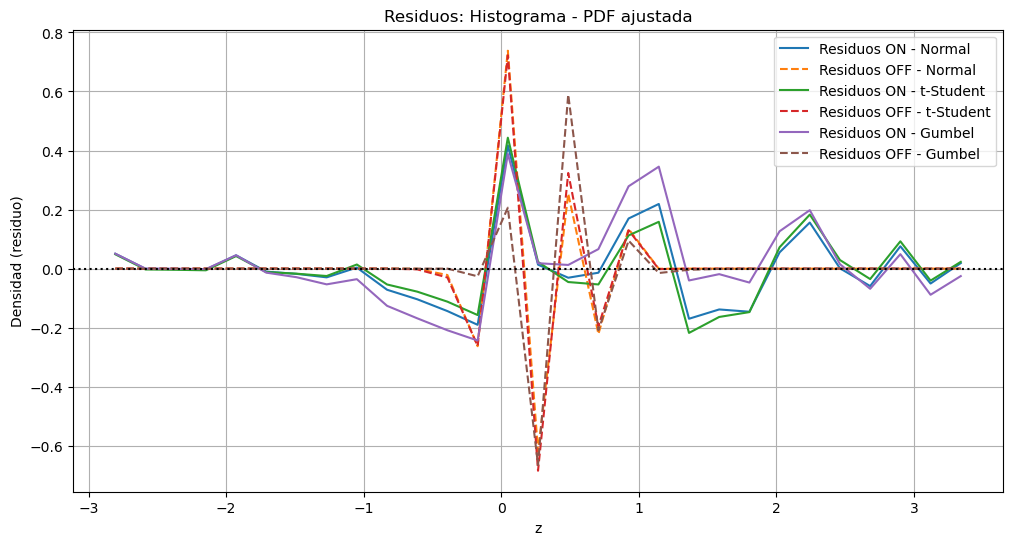

In [8]:

# Graficar residuos: diferencia entre histograma y PDF ajustada

bins = np.linspace(min(min(z_on), min(z_off)), max(max(z_on), max(z_off)), 30)
hist_on, edges = np.histogram(z_on, bins=bins, density=True)
hist_off, _ = np.histogram(z_off, bins=bins, density=True)
centers = 0.5 * (edges[1:] + edges[:-1])
x_vals = np.linspace(min(centers), max(centers), 300)

plt.figure(figsize=(12, 6))
for name, dist in dists.items():
    params_on = dist.fit(z_on)
    params_off = dist.fit(z_off)
    pdf_on_fit = dist.pdf(centers, *params_on)
    pdf_off_fit = dist.pdf(centers, *params_off)
    
    resid_on = hist_on - pdf_on_fit
    resid_off = hist_off - pdf_off_fit

    plt.plot(centers, resid_on, label=f"Residuos ON - {name}")
    plt.plot(centers, resid_off, linestyle="--", label=f"Residuos OFF - {name}")

plt.axhline(0, color="black", linestyle=":")
plt.title("Residuos: Histograma - PDF ajustada")
plt.xlabel("z")
plt.ylabel("Densidad (residuo)")
plt.legend()
plt.grid(True)
plt.show()
